In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

pd.options.display.max_rows = 20

C:\Users\Admin\Documents\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%time data = pd.read_table('C:/Users/Admin/Desktop/python2019/Python_Project_Bank_Lending/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

Wall time: 58.9 s


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Exploratory Data Analysis

In [4]:
data.shape #(rows,columns)

(855969, 73)

In [5]:
data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

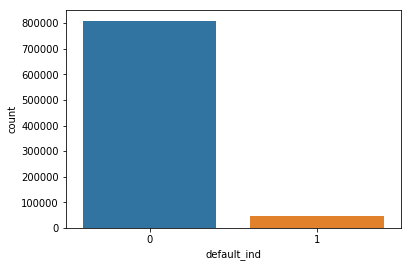

In [6]:
sns.countplot('default_ind',data=data)


In [7]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
                     ...  
il_util             844360
open_rv_12m         842681
open_rv_24m         842681
max_bal_bc          842681
all_util            842681
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

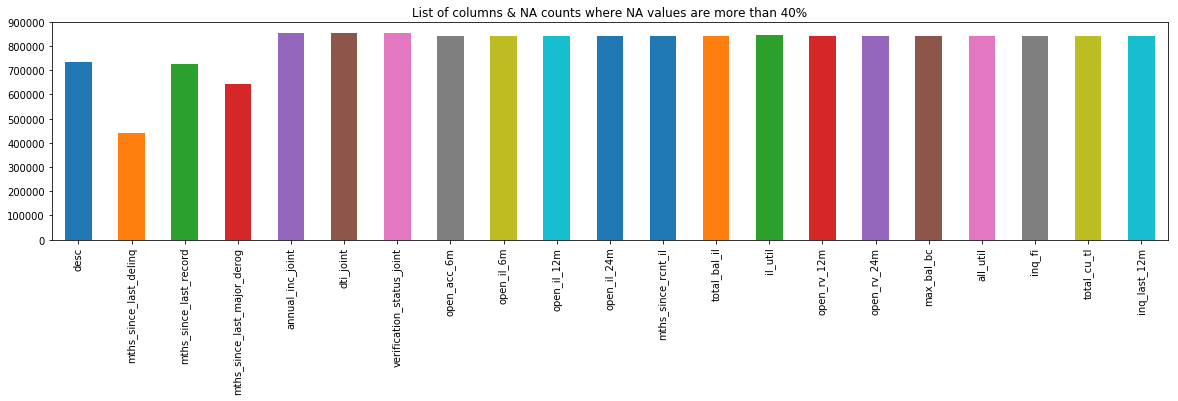

In [8]:
NA_col=data.isnull().sum()
NA_col=NA_col[NA_col.values>(0.4*len(data))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of columns & NA counts where NA values are more than 40%')
plt.show()

In [9]:
data_new=data.columns[data.isnull().sum()<800000]

In [10]:
data_new=data[data.columns[data.isnull().sum()<800000]]

data_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


# Correlation of target variable with others

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = data_new.corr()
cor_target = (cor["default_ind"])

cor_target

id                            -0.219832
member_id                     -0.220181
loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
                                 ...   
collection_recovery_fee        0.330764
last_pymnt_amnt               -0.087217
collections_12_mths_ex_med    -0.010650
mths_since_last_major_derog   -0.013658
policy_code                         NaN
acc_now_delinq                -0.003116
tot_coll_amt                  -0.001921
tot_cur_bal                   -0.036335
total_rev_hi_lim              -0.033620
default_ind                    1.000000
Name: default_ind, Length: 36, dtype: float64

<Figure size 1440x1296 with 0 Axes>

# Removing columns with very low correlation

In [12]:
lis2=[]
for i in range(len(cor_target)):
    if cor_target[i]<0.02 and cor_target[i]>(-0.02):
        lis2.append(cor_target.index[i])

In [13]:
for i in range(len(lis2)):
    data_new.drop(lis2[i],axis=1, inplace = True) 

C:\Users\Admin\Documents\python\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
data_new.head()

,id,member_id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,36 months,10.65,B,B2,NaN,10+ years,RENT,24000.0,...,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0
1,1077430,1314167,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,...,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,1
2,1077175,1313524,36 months,15.96,C,C5,NaN,10+ years,RENT,12252.0,...,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0
3,1076863,1277178,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0
4,1075358,1311748,60 months,12.69,B,B5,University Medical Group,1 year,RENT,80000.0,...,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0


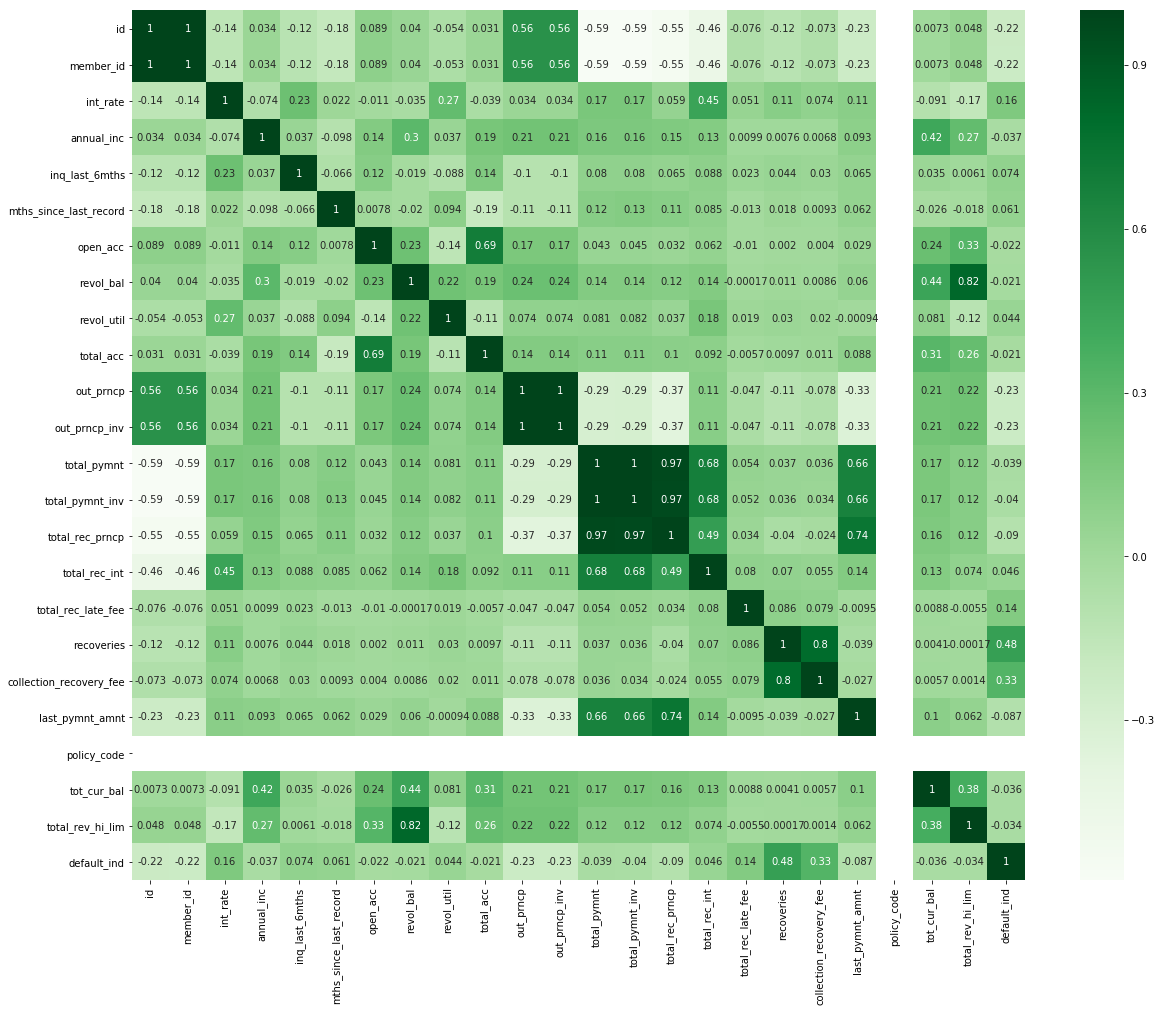

In [15]:
plt.figure(figsize=(20,16))
cor = data_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

In [16]:
data_new.columns

Index(['id', 'member_id', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'policy_code', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

C:\Users\Admin\Documents\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


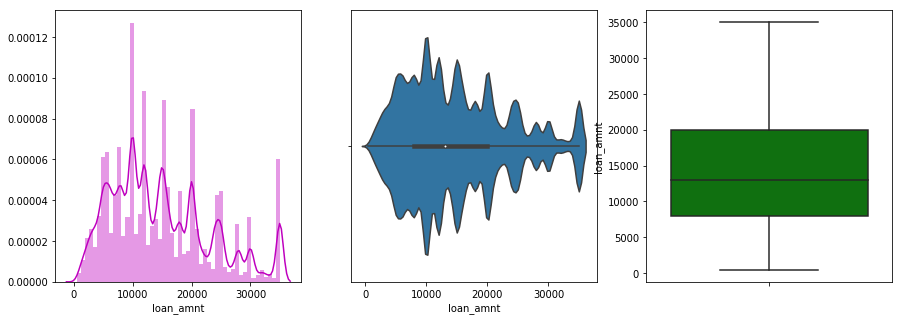

In [32]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x=data.loan_amnt, orient="v", color='g',ax=axs[2])
sns.distplot(data.loan_amnt, color="m",ax=axs[0])
sns.violinplot(x=data["loan_amnt"],ax=axs[1])


C:\Users\Admin\Documents\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


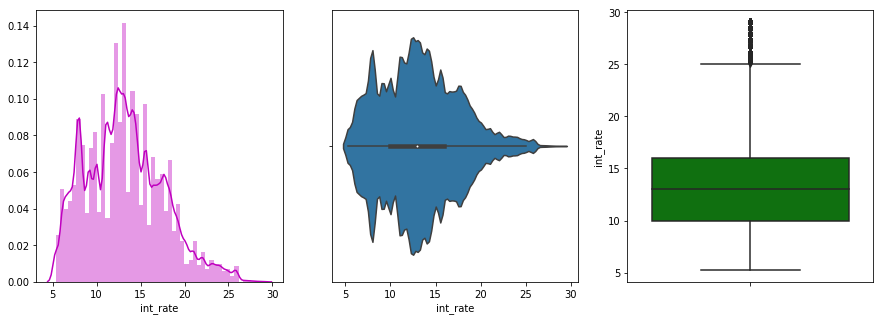

In [31]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x=data.int_rate, orient="v", color='g',ax=axs[2])
sns.distplot(data.int_rate, color="m",ax=axs[0])
sns.violinplot(x=data["int_rate"],ax=axs[1])


In [33]:
data_new['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

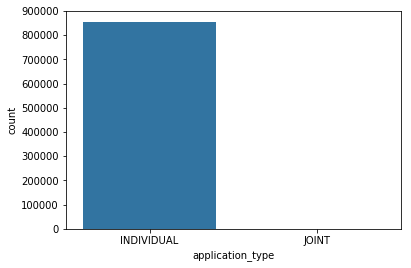

In [34]:
sns.countplot('application_type',data=data_new)

In [35]:
data_new['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

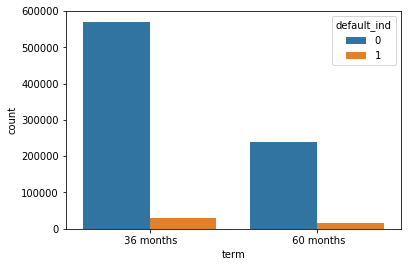

In [36]:
sns.countplot('term',data=data_new,hue='default_ind')

In [37]:
data_new['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

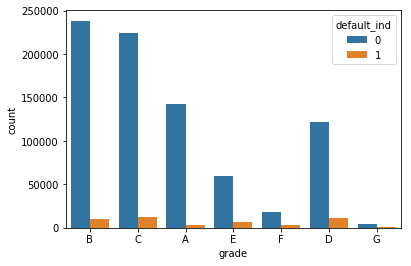

In [38]:
sns.countplot('grade',data=data_new,hue='default_ind')

In [39]:
df=data_new.groupby('verification_status')
df['default_ind'].value_counts()

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64

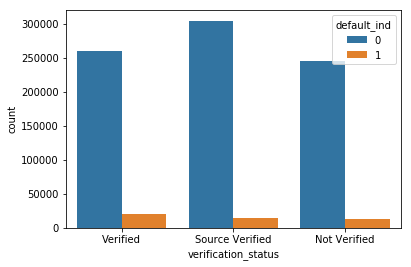

In [40]:
sns.countplot('verification_status',data=data_new,hue='default_ind')

# Data Cleanse and Creating dummies

In [41]:
df=pd.get_dummies(data_new['verification_status'],drop_first=True)
data_new=pd.concat([df,data_new],axis=1)

In [42]:
data_new.drop(['verification_status'],axis=1, inplace = True) 

In [43]:
data_new['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

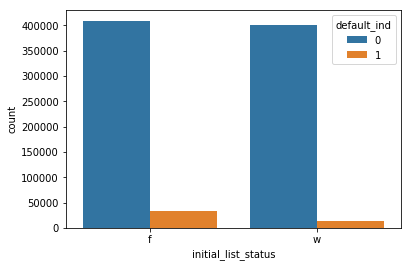

In [44]:
sns.countplot('initial_list_status',data=data_new,hue='default_ind')

In [45]:
data_new['initial_list_status'] = np.where(data_new['initial_list_status']=='f', 0, data_new['initial_list_status'])
data_new['initial_list_status'] = np.where(data_new['initial_list_status']=='w', 1, data_new['initial_list_status'])

In [46]:
data_new['initial_list_status'].value_counts()

0    442555
1    413414
Name: initial_list_status, dtype: int64

In [47]:
data_new['initial_list_status']=data_new['initial_list_status'].astype(float)

In [48]:
data_new['term'] = np.where(data_new['term']==' 36 months', 0, data_new['term'])
data_new['term'] = np.where(data_new['term']==' 60 months', 1, data_new['term'])

In [49]:
data_new['term'].value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [50]:
data_new['term']=data_new['term'].astype(float)

In [51]:
data_new['grade'] = np.where(data_new['grade']=='A', 0, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='B', 0, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='C', 0, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='D', 1, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='E', 1, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='F', 1, data_new['grade'])
data_new['grade'] = np.where(data_new['grade']=='G', 1, data_new['grade'])

In [52]:
data_new['grade'].value_counts()

0    630518
1    225451
Name: grade, dtype: int64

In [53]:
data_new['grade']=data_new['grade'].astype(float)

In [54]:
data_new['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [55]:
df=data_new.groupby('home_ownership')
df['default_ind'].value_counts()


home_ownership  default_ind
ANY             0                   3
MORTGAGE        0              408730
                1               20376
NONE            0                  38
                1                   7
OTHER           0                 117
                1                  27
OWN             0               80001
                1                4135
RENT            0              320613
                1               21922
Name: default_ind, dtype: int64

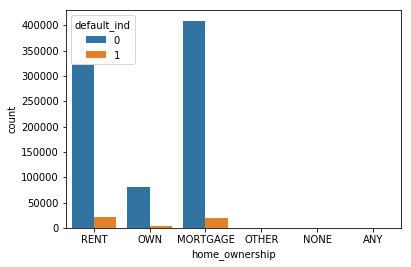

In [56]:
sns.countplot('home_ownership',data=data_new,hue='default_ind')

In [57]:
data_new['home_ownership'] = np.where(data_new['home_ownership']=='RENT', 1, data_new['home_ownership'])
data_new['home_ownership'] = np.where(data_new['home_ownership']=='OWN', 1, data_new['home_ownership'])
data_new['home_ownership'] = np.where(data_new['home_ownership']=='MORTGAGE', 1, data_new['home_ownership'])
data_new['home_ownership'] = np.where(data_new['home_ownership']=='NONE', 2, data_new['home_ownership'])
data_new['home_ownership'] = np.where(data_new['home_ownership']=='OTHER', 2, data_new['home_ownership'])
data_new['home_ownership'] = np.where(data_new['home_ownership']=='ANY', 0, data_new['home_ownership'])


In [58]:
data_new['home_ownership'].value_counts()

1    855777
2       189
0         3
Name: home_ownership, dtype: int64

In [59]:
df=pd.get_dummies(data_new['home_ownership'],drop_first=True)
data_new=pd.concat([df,data_new],axis=1)
data_new.drop(['home_ownership'],axis=1, inplace = True)
# Dummy Variables

In [60]:
data_new['pymnt_plan'].value_counts()


n    855964
y         5
Name: pymnt_plan, dtype: int64

In [61]:
data_new.drop(['pymnt_plan'],axis=1, inplace = True)

In [62]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 45 columns):
1                          855969 non-null uint8
2                          855969 non-null uint8
Source Verified            855969 non-null uint8
Verified                   855969 non-null uint8
id                         855969 non-null int64
member_id                  855969 non-null int64
term                       855969 non-null float64
int_rate                   855969 non-null float64
grade                      855969 non-null float64
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
annual_inc                 855969 non-null float64
issue_d                    855969 non-null datetime64[ns]
desc                       121812 non-null object
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969

In [63]:
data_new['last_credit_pull_d'] = pd.to_datetime(data_new['last_credit_pull_d'])
data_new['Month'] = data_new['last_credit_pull_d'].apply(lambda x: x.month)
data_new['Year'] = data_new['last_credit_pull_d'].apply(lambda x: x.year)
data_new = data_new.drop(['last_credit_pull_d'], axis = 1)


In [64]:
import operator
lis3=[]
for i in range(len(data_new.dtypes)):
    if (data_new.dtypes[i]!='object'):
        lis3.append(data_new.dtypes.index[i])

In [65]:
data_new=data_new[lis3]

In [66]:
data_new.isnull().sum()

1                              0
2                              0
Source Verified                0
Verified                       0
id                             0
member_id                      0
term                           0
int_rate                       0
grade                          0
annual_inc                     0
                           ...  
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
policy_code                    0
tot_cur_bal                67313
total_rev_hi_lim           67313
default_ind                    0
Month                         50
Year                          50
Length: 34, dtype: int64

In [67]:
data_new.drop(['mths_since_last_record','id','member_id','tot_cur_bal','total_rev_hi_lim','policy_code'], axis = 1,inplace=True)

# Filling null values

In [68]:
data_new['revol_util'].fillna(data_new['revol_util'].mean(),inplace=True)
data_new['Month'].fillna(data_new.mode()['Month'][0],inplace=True)
data_new['Year'].fillna(data_new.mode()['Year'][0],inplace=True)

In [69]:
data_new.shape

(855969, 28)

In [70]:
data_new['last']=data_new['default_ind']
data_new.drop(['default_ind'],axis=1, inplace = True)



In [71]:

data_new['default_ind']=data_new['last']

data_new['default_ind']


0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
         ..
855959    0
855960    0
855961    1
855962    0
855963    0
855964    0
855965    0
855966    0
855967    0
855968    0
Name: default_ind, Length: 855969, dtype: int64

In [72]:

data_new.drop(['last'],axis=1, inplace = True)
data_new.head()

,1,2,Source Verified,Verified,term,int_rate,grade,annual_inc,issue_d,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,Month,Year,default_ind
0,1,0,0,1,0.0,10.65,0.0,24000.0,2011-12-01,1.0,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,2016.0,0
1,1,0,1,0,1.0,15.27,0.0,30000.0,2011-12-01,5.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,9.0,2013.0,1
2,1,0,0,0,0.0,15.96,0.0,12252.0,2011-12-01,2.0,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,2016.0,0
3,1,0,1,0,0.0,13.49,0.0,49200.0,2011-12-01,1.0,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,2015.0,0
4,1,0,1,0,1.0,12.69,0.0,80000.0,2011-12-01,0.0,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,2016.0,0


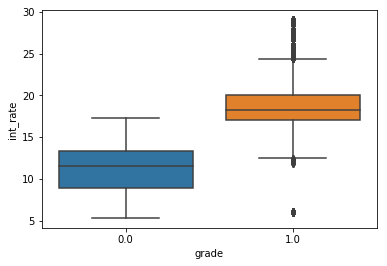

In [73]:
sns.boxplot('grade','int_rate',data=data_new)

In [74]:
data_new.columns

Index([                        1,                         2,
               'Source Verified',                'Verified',
                          'term',                'int_rate',
                         'grade',              'annual_inc',
                       'issue_d',          'inq_last_6mths',
                      'open_acc',               'revol_bal',
                    'revol_util',               'total_acc',
           'initial_list_status',               'out_prncp',
                 'out_prncp_inv',             'total_pymnt',
               'total_pymnt_inv',         'total_rec_prncp',
                 'total_rec_int',      'total_rec_late_fee',
                    'recoveries', 'collection_recovery_fee',
               'last_pymnt_amnt',                   'Month',
                          'Year',             'default_ind'],
      dtype='object')

In [75]:
data_new.shape

(855969, 28)

In [76]:
train = data_new[data_new['issue_d'] < '2015-6-01']
test = data_new[data_new['issue_d'] >= '2015-6-01']

In [77]:
train.shape

(598978, 28)

In [78]:
data_new.drop(['issue_d'],axis=1, inplace = True)

In [79]:
test.shape

(256991, 28)

# Splitting and Model building

In [80]:
X=data_new.iloc[:,:-1].values
y=data_new.iloc[:,-1].values

In [81]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [121]:
lr=RandomForestClassifier(n_estimators=200, min_samples_split=30, criterion='entropy')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)

# Confusion matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
acc=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)
acc.mean()

In [86]:
y_pred_prob_1=y_pred_prob[:,1]

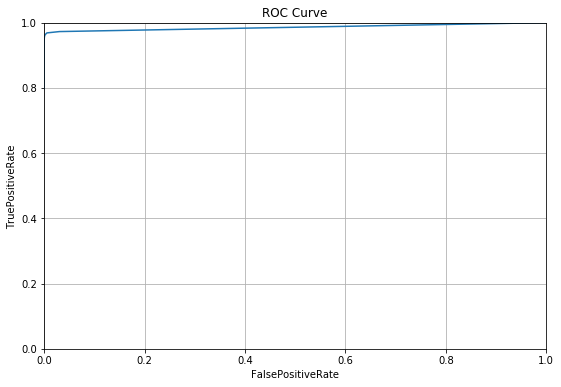

In [87]:
plt.figure(figsize=(9,6))
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob_1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)

# Logistic Regression

In [107]:
logmodel = LogisticRegression()

In [108]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
predictions = logmodel.predict(X_test)

In [114]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    202450
          1       0.98      0.74      0.84     11543

avg / total       0.98      0.98      0.98    213993



In [115]:
cm=confusion_matrix(y_test,predictions)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test,predictions)

0.9848873561284714

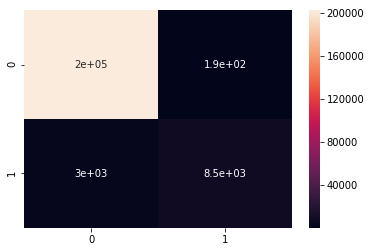

In [118]:
sns.heatmap(cm, annot=True)